# 1. Install Dependencies and Setup

In [1]:
!pip list

Package                       Version
----------------------------- -----------
absl-py                       1.3.0
agate                         1.6.3
aiohttp                       3.8.3
aiosignal                     1.2.0
altair                        4.2.2
anyio                         3.6.2
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
asn1crypto                    1.5.1
asttokens                     2.0.8
astunparse                    1.6.3
async-timeout                 4.0.2
attrs                         22.1.0
Automat                       20.2.0
Babel                         2.10.3
backcall                      0.2.0
bcrypt                        4.0.1
beautifulsoup4                4.11.1
bleach                        5.0.1
blis                          0.7.9
boto3                         1.24.95
botocore                      1.27.95
branca                        0.5.0
cachetools                    5.2.0
catalogue 

In [2]:
import tensorflow as tf 
import os

2023-05-11 00:11:37.439454: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-11 00:11:37.541720: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-11 00:11:37.546739: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-11 00:11:37.546755: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [3]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

2023-05-11 00:11:39.028848: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-05-11 00:11:39.028886: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-05-11 00:11:39.028904: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (p-e12bc7d3-6b03-4608-9bcb-a03ef893b7a9): /proc/driver/nvidia/version does not exist


In [4]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [33]:
import imghdr
import pandas as pd

In [6]:
data_dir = '/work/Cancer3'

In [7]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [8]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))

Issue with image /work/Cancer3/PC/ProstateC40.jpeg
Issue with image /work/Cancer3/PC/ProstateC22.jpeg
Issue with image /work/Cancer3/PC/ProstateC17.jpeg
Issue with image /work/Cancer3/PC/ProstateC26.jpeg
Issue with image /work/Cancer3/PC/ProstateC32.jpeg
Issue with image /work/Cancer3/PC/ProstateC03.jpeg
Issue with image /work/Cancer3/PC/ProstateC07.jpeg
Issue with image /work/Cancer3/PC/ProstateC36.jpeg
Issue with image /work/Cancer3/PC/ProstateC33.jpeg
Issue with image /work/Cancer3/PC/ProstateC37.jpeg
Issue with image /work/Cancer3/PC/ProstateC41.jpeg
Issue with image /work/Cancer3/PC/ProstateC23.jpeg
Issue with image /work/Cancer3/PC/ProstateC12.jpeg
Issue with image /work/Cancer3/PC/ProstateC16.jpeg
Issue with image /work/Cancer3/PC/ProstateC27.jpeg
Issue with image /work/Cancer3/PC/ProstateC29.jpeg
Issue with image /work/Cancer3/PC/ProstateC18.jpeg
Issue with image /work/Cancer3/PC/ProstateC31.jpeg
Issue with image /work/Cancer3/PC/ProstateC04.jpeg
Issue with image /work/Cancer3/

# 3. Load Data

In [9]:
import numpy as np
from matplotlib import pyplot as plt

In [10]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

In [11]:
data = tf.keras.utils.image_dataset_from_directory('/work/Cancer3')

Found 72 files belonging to 2 classes.
2023-05-11 00:11:39.793320: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
data_iterator = data.as_numpy_iterator()

In [13]:
batch = data_iterator.next()

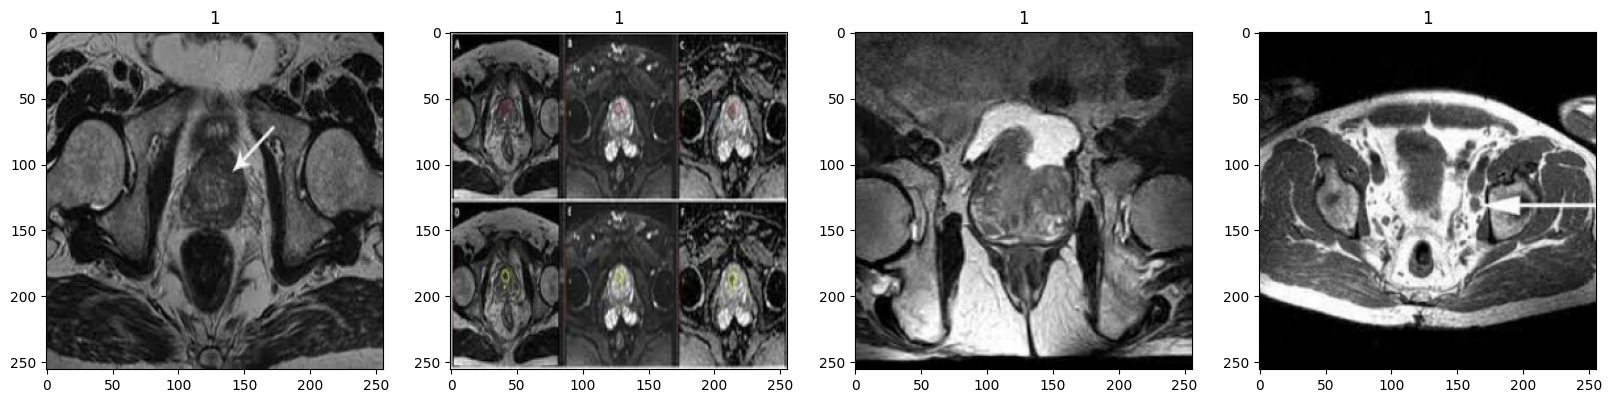

In [14]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [15]:
data = data.map(lambda x,y: (x/255, y))

In [16]:
data.as_numpy_iterator().next()

(array([[[[7.48743892e-01, 7.48743892e-01, 7.48743892e-01],
          [7.58809626e-01, 7.58809626e-01, 7.58809626e-01],
          [7.53819108e-01, 7.53819108e-01, 7.53819108e-01],
          ...,
          [1.37794286e-01, 1.37794286e-01, 1.37794286e-01],
          [1.25428915e-01, 1.25428915e-01, 1.25428915e-01],
          [1.25428915e-01, 1.25428915e-01, 1.25428915e-01]],
 
         [[7.12622523e-01, 7.12622523e-01, 7.12622523e-01],
          [7.33007669e-01, 7.33007669e-01, 7.33007669e-01],
          [7.46221900e-01, 7.46221900e-01, 7.46221900e-01],
          ...,
          [1.28387928e-01, 1.28387928e-01, 1.28387928e-01],
          [1.17738970e-01, 1.17738970e-01, 1.17738970e-01],
          [1.17738970e-01, 1.17738970e-01, 1.17738970e-01]],
 
         [[6.66360319e-01, 6.66360319e-01, 6.66360319e-01],
          [7.01668561e-01, 7.01668561e-01, 7.01668561e-01],
          [7.23397195e-01, 7.23397195e-01, 7.23397195e-01],
          ...,
          [1.24852680e-01, 1.24852680e-01, 1.2485

# 5. Split Data

In [17]:
count = 0
for batch in data:
    count += len(batch[0])
train_size = int(count * 0.7)
val_size = int(count * 0.2)
test_size = int(count * 0.1)


In [18]:
train_size

50

In [19]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [20]:

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [21]:
base_model = VGG16(include_top=False, weights='imagenet', input_shape=(256, 256, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [22]:
for layer in base_model.layers:
    layer.trainable = False

In [23]:
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)


In [24]:
model = Model(inputs=base_model.input, outputs=predictions)


In [25]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# 7. Train

In [26]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [27]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])


Epoch 1/20
3/3 [==============================] - 6s 2s/step - loss: 7.1443 - accuracy: 0.4583
Epoch 2/20
3/3 [==============================] - 6s 2s/step - loss: 4.8182 - accuracy: 0.5000
Epoch 3/20
3/3 [==============================] - 6s 2s/step - loss: 2.0988 - accuracy: 0.5694
Epoch 4/20
3/3 [==============================] - 6s 2s/step - loss: 1.8162 - accuracy: 0.5000
Epoch 5/20
3/3 [==============================] - 6s 2s/step - loss: 0.8830 - accuracy: 0.6667
Epoch 6/20
3/3 [==============================] - 6s 2s/step - loss: 0.6180 - accuracy: 0.6806
Epoch 7/20
3/3 [==============================] - 6s 2s/step - loss: 0.3043 - accuracy: 0.8611
Epoch 8/20
3/3 [==============================] - 6s 2s/step - loss: 0.1954 - accuracy: 0.8750
Epoch 9/20
3/3 [==============================] - 6s 2s/step - loss: 0.2693 - accuracy: 0.8472
Epoch 10/20
3/3 [==============================] - 6s 2s/step - loss: 0.0443 - accuracy: 0.9861
Epoch 11/20
3/3 [==============================] 

# 8. Plot Performance

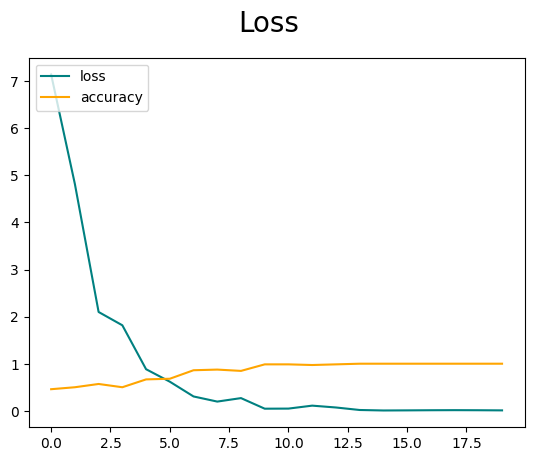

In [28]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['accuracy'], color='orange', label='accuracy')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [29]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [30]:
pre = tf.keras.metrics.Precision()
re = tf.keras.metrics.Recall()
acc = tf.keras.metrics.BinaryAccuracy()

In [31]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [34]:

train_loss = []
train_accuracy = []
test_loss = []
test_accuracy = []

for epoch in range(20):
    hist = model.fit(train, epochs=1, validation_data=val, callbacks=[tensorboard_callback])
    train_loss.append(hist.history['loss'][0])
    train_accuracy.append(hist.history['accuracy'][0])

# Create a table
results = pd.DataFrame({'Train Accuracy': train_accuracy,
                       'Train Loss': train_loss,
                       'Epochs': range(1, 21)})

# Display the table
print(results)

3/3 [==============================] - 6s 2s/step - loss: 9.8912e-04 - accuracy: 1.0000
    Train Accuracy  Train Loss  Epochs
0              1.0    0.001506       1
1              1.0    0.001477       2
2              1.0    0.001447       3
3              1.0    0.001413       4
4              1.0    0.001386       5
5              1.0    0.001351       6
6              1.0    0.001322       7
7              1.0    0.001289       8
8              1.0    0.001262       9
9              1.0    0.001234      10
10             1.0    0.001210      11
11             1.0    0.001185      12
12             1.0    0.001161      13
13             1.0    0.001139      14
14             1.0    0.001115      15
15             1.0    0.001089      16
16             1.0    0.001063      17
17             1.0    0.001039      18
18             1.0    0.001012      19
19             1.0    0.000989      20


# 10. Test

In [35]:
from PIL import Image

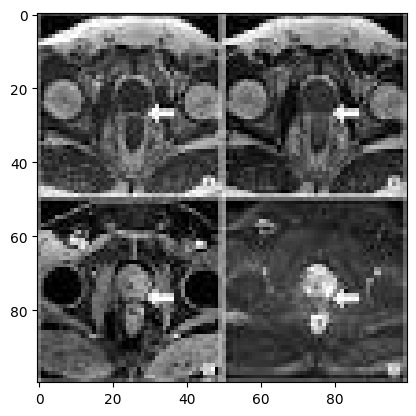

In [36]:
img = Image.open('/work/Cancer3/PC/ProstateC08.jpeg')
plt.imshow(img)
plt.show()

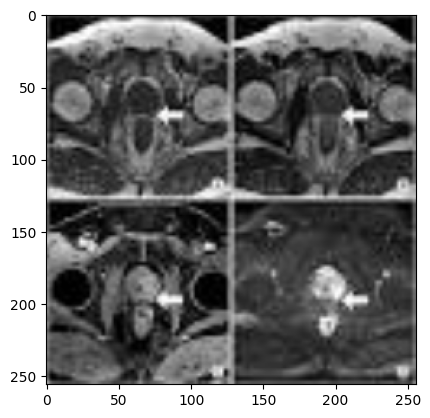

In [37]:
# Convert the image to a tensor
img_tensor = tf.keras.preprocessing.image.img_to_array(img)

# Resize the tensor
resize = tf.image.resize(img_tensor, (256,256))

# Display the resized image
plt.imshow(resize.numpy().astype(int))
plt.show()

In [38]:
img_rgb = img.convert('RGB')
img_resized = img_rgb.resize((256, 256))

# Convert to numpy array
img_array = np.array(img_resized)

# Preprocess image and make prediction
yhat = model.predict(np.expand_dims(img_array/255, 0))

1/1 [==============================] - 0s 200ms/step


In [39]:
predicted_class = np.argmax(yhat)

# Get the test accuracy and test loss for the predicted class
test_accuracy = yhat[0][predicted_class]
test_loss = -np.log(yhat[0][predicted_class])

print("Test Accuracy:", test_accuracy)
print("Test Loss:", test_loss)

Test Accuracy: 0.9988847
Test Loss: 0.0011159446


In [40]:
if yhat < 0.5: 
    print(f'Predicted class is BladderCancer')
else:
    print(f'Predicted class is ProstateCancer')

Predicted class is ProstateCancer


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e12bc7d3-6b03-4608-9bcb-a03ef893b7a9' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>